# Compare speed and similarity in results for two cross-validation schemes

Cross-validation is important for 1) tuning to determine alpha and lambda parameters in elastic net models, and 2) evaluating performance of optimized models while parameters are fixed.

We wish to perform cross-validation in a manner that will give us the best cost/benefit ratio with respect to computational expense and model quality.

## Prepare inputs

### Libraries and functions

In [1]:
library(CpGWAS)

Let's run these tests over a very small chunk on one chromosome.

In [2]:
convertToDataFrame <- function(object) {
  if (!inherits(object, "MethylationScaff")) {
    stop("The object must be of class 'MethylationScaff'.")
  }

  modelsList <- lapply(object@models, function(model) {
    data.frame(
      scaffoldIdentifier = object@scaffoldIdentifier,  # Scaffold identifier is the same for all models
      methylationPosition = model@methylationPosition,
      windowSize = model@windowSize,
      nSNPs = model@n_SNPs,
      cor_cv = model@evaluation_results['cor'],
      mse_cv = model@evaluation_results['mse'],
      cor_full = model@full_model_metrics['r'],
      mse_full = model@full_model_metrics['mse'],
      alpha = model@alpha,
      lambda = model@lambda
    )
  })

  do.call("rbind", modelsList)
}

## Compare `cv_pred` to overall evaluation

In [3]:
scaff_paths <- list.files("../output/", pattern = "rds", full.names = TRUE)

In [4]:
scaff_paths <- scaff_paths[grepl("1006", scaff_paths)]
scaff_paths <- scaff_paths[grepl("1corestotal-1", scaff_paths)]

In [5]:
scaff_paths

[1] "../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1006000-1006999-dynamic-1corestotal-1corepera-20240205-120121.rds"
[2] "../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1006000-1006999-dynamic-1corestotal-1corepera-20240205-120214.rds"
[3] "../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1006000-1006999-dynamic-1corestotal-1corepera-20240205-120236.rds"
[4] "../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1006000-1006999-static-1corestotal-1corepera-20240205-120215.rds" 
[5] "../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1006000-1006999-static-1corestotal-1corepera-20240205-120237.rds" 
[6] "../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1006000-1006999-static-1corestotal-1corepera-20240205-120316.rds"

In [6]:
my_scaff <- readRDS(scaff_paths[1])
dynamic_a1 <- convertToDataFrame(my_scaff)
dynamic_a1 <- dynamic_a1[which(dynamic_a1$windowSize == 500000), ]
dynamic_a1$scaffoldIdentifier <- NULL
rownames(dynamic_a1) <- NULL

In [7]:
my_scaff4 <- readRDS(scaff_paths[4])
static_a1 <- convertToDataFrame(my_scaff4)
static_a1 <- static_a1[which(static_a1$windowSize == 500000), ]
static_a1$scaffoldIdentifier <- NULL
rownames(static_a1) <- NULL

In [22]:
scaff_paths <- list.files("../output/", pattern = "rds", full.names = TRUE)
scaff_paths <- scaff_paths[grepl("1007", scaff_paths)]
scaff_paths <- scaff_paths[grepl("1corestotal-1", scaff_paths)]

In [24]:
my_scaff2 <- readRDS(scaff_paths[2])
dynamic_a2 <- convertToDataFrame(my_scaff2)
dynamic_a2 <- dynamic_a2[which(dynamic_a2$windowSize == 500000), ]
dynamic_a2$scaffoldIdentifier <- NULL
rownames(dynamic_a2) <- NULL

my_scaff5 <- readRDS(scaff_paths[5])
static_a2 <- convertToDataFrame(my_scaff5)
static_a2 <- static_a2[which(static_a2$windowSize == 500000), ]
static_a2$scaffoldIdentifier <- NULL
rownames(static_a2) <- NULL

In [51]:
scaff_paths <- list.files("../output/", pattern = "rds", full.names = TRUE)

In [54]:
scaff_paths <- scaff_paths[grepl("1008", scaff_paths)]
                                 

In [49]:
scaff_paths <- scaff_paths[grepl("1corestotal-1", scaff_paths)]

In [57]:
my_scaff3 <- readRDS(scaff_paths[1])
dynamic_a3 <- convertToDataFrame(my_scaff3)
dynamic_a3 <- dynamic_a3[which(dynamic_a3$windowSize == 500000), ]
dynamic_a3$scaffoldIdentifier <- NULL
rownames(dynamic_a3) <- NULL

my_scaff6 <- readRDS(scaff_paths[4])
static_a3 <- convertToDataFrame(my_scaff6)
static_a3 <- static_a3[which(static_a3$windowSize == 500000), ]
static_a3$scaffoldIdentifier <- NULL
rownames(static_a3) <- NULL

In [71]:
a1 <- merge(static_a1, dynamic_a1, by = c("methylationPosition"))
a2 <- merge(static_a2, dynamic_a2, by = c("methylationPosition"))
a3 <- merge(static_a3, dynamic_a3, by = c("methylationPosition"))
static <- merge(static_a1, static_a2, by = c("methylationPosition"))
dynamic <- merge(dynamic_a1, dynamic_a2, by = c("methylationPosition"))

In [59]:
dim(a1)

[1] 1000   17

In [60]:
a1_wna <- a1
a2_wna <- a2
static_wna <- static
dynamic_wna <- dynamic

In [61]:
a1 <- na.omit(a1)
a2 <- na.omit(a2)
static <- na.omit(static)
dynamic <- na.omit(dynamic)

In [62]:
library(ggplot2)
library(ggpubr)

In [63]:
dim(a1)

[1] 268  17

In [64]:
dim(a2)

[1] 335  17

In [65]:
dim(static)

[1]  0 17

In [66]:
dim(dynamic)

[1]  0 17

In [80]:
# Create the scatter plot
r1 <- ggplot(dynamic_a1, aes(x = cor_cv, y = cor_full)) +
  geom_point() +  # Add points
  geom_smooth(method = "lm", se = TRUE, color = "blue") +  # Add regression line and CI
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +  # Diagonal line
  #annotate("text", x = Inf, y = Inf, label = sprintf("R² = %.2f", r_squared), hjust = 1.1, vjust = 1.1) +
  stat_regline_equation(aes(label = ..rr.label..), label.x.npc = "left", size = 5) +  # Add R²
  labs(x = "dynamic cross-validation evaluation", y = "full model evaluation") +
  ggtitle("Comparison of correlations across\nmethods of model evaluation\n(Chr1:1006000-1006999)") + 
  theme(
    text = element_text(size = 16),  # Increase global text size
    axis.title = element_text(size = 18),  # Increase axis titles size
    axis.text = element_text(size = 14),  # Increase axis text size
    legend.title = element_text(size = 16),  # Increase legend title size
    legend.text = element_text(size = 14)  # Increase legend text size
  )

# Create the scatter plot
r2 <- ggplot(dynamic_a2, aes(x = cor_cv, y = cor_full)) +
  geom_point() +  # Add points
  geom_smooth(method = "lm", se = TRUE, color = "blue") +  # Add regression line and CI
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +  # Diagonal line
  #annotate("text", x = Inf, y = Inf, label = sprintf("R² = %.2f", r_squared), hjust = 1.1, vjust = 1.1) +
  stat_regline_equation(aes(label = ..rr.label..), label.x.npc = "left", size = 5) +  # Add R²
  labs(x = "dynamic cross-validation evaluation", y = "full model evaluation") +
  ggtitle("Comparison of correlations across\nmethods of model evaluation\n(Chr1:1007000-1007999)") + 
  theme(
    text = element_text(size = 16),  # Increase global text size
    axis.title = element_text(size = 18),  # Increase axis titles size
    axis.text = element_text(size = 14),  # Increase axis text size
    legend.title = element_text(size = 16),  # Increase legend title size
    legend.text = element_text(size = 14)  # Increase legend text size
  )

# Create the scatter plot
r3 <- ggplot(dynamic_a3, aes(x = cor_cv, y = cor_full)) +
  geom_point() +  # Add points
  geom_smooth(method = "lm", se = TRUE, color = "blue") +  # Add regression line and CI
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +  # Diagonal line
  #annotate("text", x = Inf, y = Inf, label = sprintf("R² = %.2f", r_squared), hjust = 1.1, vjust = 1.1) +
  stat_regline_equation(aes(label = ..rr.label..), label.x.npc = "left", size = 5) +  # Add R²
  labs(x = "dynamic cross-validation evaluation", y = "full model evaluation") +
  ggtitle("Comparison of correlations across\nmethods of model evaluation\n(Chr1:1008000-1008999)") + 
  theme(
    text = element_text(size = 16),  # Increase global text size
    axis.title = element_text(size = 18),  # Increase axis titles size
    axis.text = element_text(size = 14),  # Increase axis text size
    legend.title = element_text(size = 16),  # Increase legend title size
    legend.text = element_text(size = 14)  # Increase legend text size
  )

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 724 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 724 rows containing non-finite values (`stat_regline_equation()`).”
Warning message:
“Removed 724 rows containing missing values (`geom_point()`).”


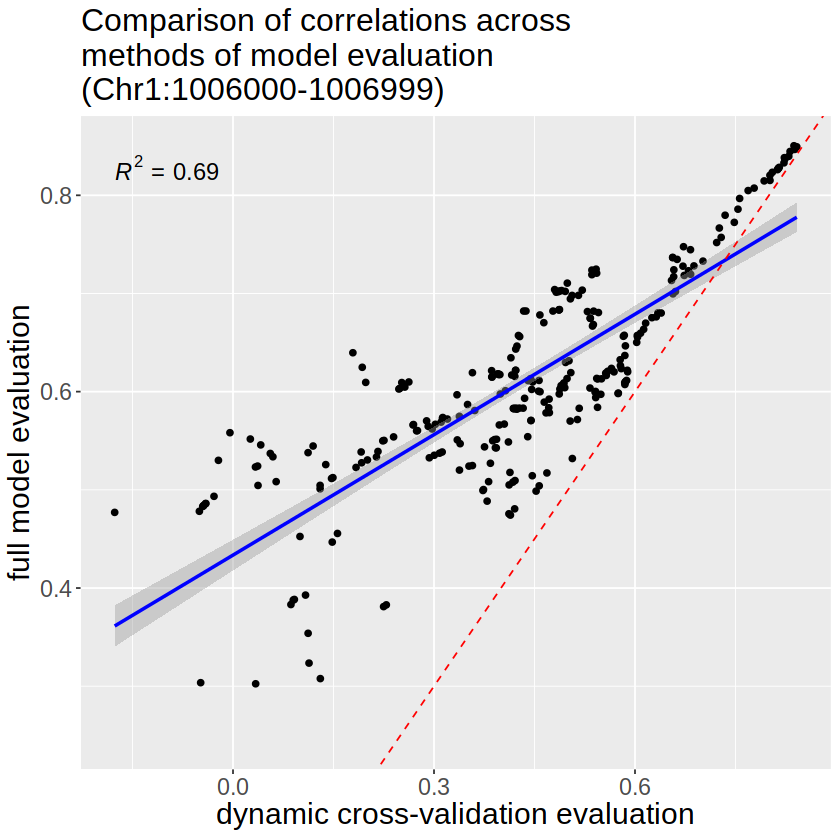

In [81]:
r1

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 661 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 661 rows containing non-finite values (`stat_regline_equation()`).”
Warning message:
“Removed 661 rows containing missing values (`geom_point()`).”


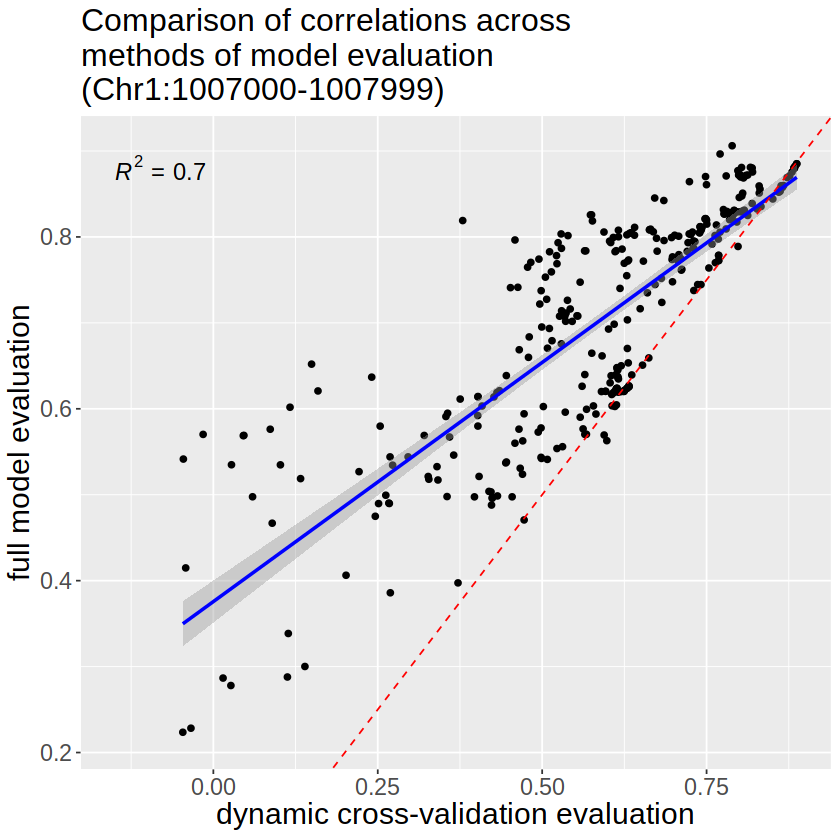

In [82]:
r2

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 809 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 809 rows containing non-finite values (`stat_regline_equation()`).”
Warning message:
“Removed 809 rows containing missing values (`geom_point()`).”


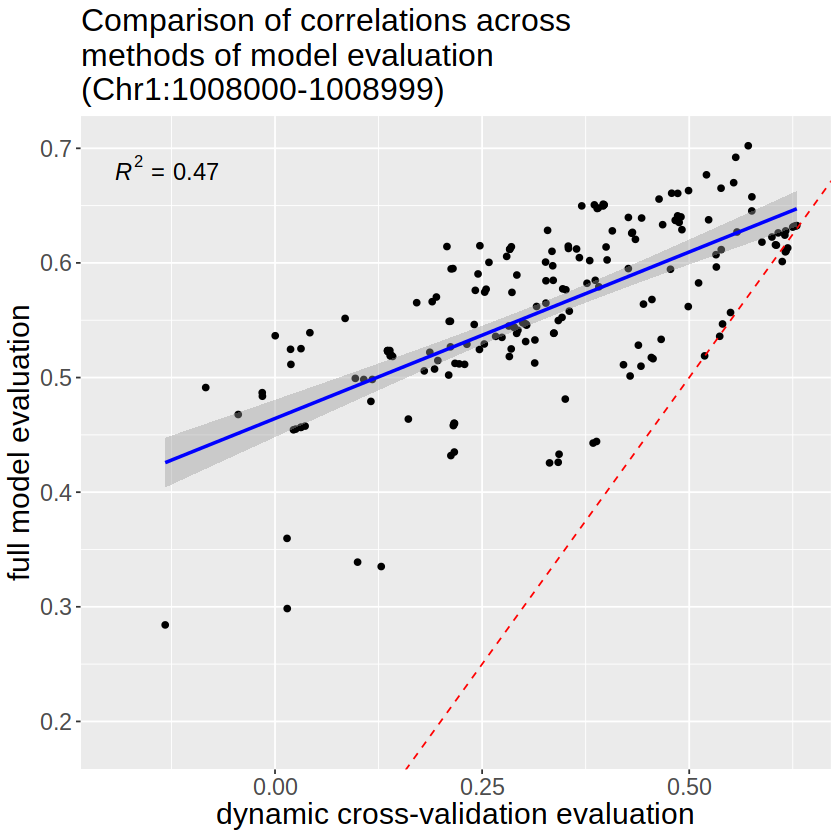

In [83]:
r3

In [84]:
# Create the scatter plot
r1 <- ggplot(a1, aes(x = cor_cv.y, y = cor_cv.x)) +
  geom_point() +  # Add points
  geom_smooth(method = "lm", se = TRUE, color = "blue") +  # Add regression line and CI
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +  # Diagonal line
  #annotate("text", x = Inf, y = Inf, label = sprintf("R² = %.2f", r_squared), hjust = 1.1, vjust = 1.1) +
  stat_regline_equation(aes(label = ..rr.label..), label.x.npc = "left", size = 5) +  # Add R²
  labs(x = "dynamic cross-validation evaluation", y = "static cross-validation evaluation") +
  ggtitle("Comparison of correlations across\nmethods of model evaluation\n(Chr1:1006000-1006999)") + 
  theme(
    text = element_text(size = 16),  # Increase global text size
    axis.title = element_text(size = 18),  # Increase axis titles size
    axis.text = element_text(size = 14),  # Increase axis text size
    legend.title = element_text(size = 16),  # Increase legend title size
    legend.text = element_text(size = 14)  # Increase legend text size
  )

# Create the scatter plot
r2 <- ggplot(a2, aes(x = cor_cv.y, y = cor_cv.x)) +
  geom_point() +  # Add points
  geom_smooth(method = "lm", se = TRUE, color = "blue") +  # Add regression line and CI
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +  # Diagonal line
  #annotate("text", x = Inf, y = Inf, label = sprintf("R² = %.2f", r_squared), hjust = 1.1, vjust = 1.1) +
  stat_regline_equation(aes(label = ..rr.label..), label.x.npc = "left", size = 5) +  # Add R²
  labs(x = "dynamic cross-validation evaluation", y = "static cross-validation evaluation") +
  ggtitle("Comparison of correlations across\nmethods of model evaluation\n(Chr1:1007000-1007999)") + 
  theme(
    text = element_text(size = 16),  # Increase global text size
    axis.title = element_text(size = 18),  # Increase axis titles size
    axis.text = element_text(size = 14),  # Increase axis text size
    legend.title = element_text(size = 16),  # Increase legend title size
    legend.text = element_text(size = 14)  # Increase legend text size
  )

# Create the scatter plot
r3 <- ggplot(a3, aes(x = cor_cv.y, y = cor_cv.x)) +
  geom_point() +  # Add points
  geom_smooth(method = "lm", se = TRUE, color = "blue") +  # Add regression line and CI
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +  # Diagonal line
  #annotate("text", x = Inf, y = Inf, label = sprintf("R² = %.2f", r_squared), hjust = 1.1, vjust = 1.1) +
  stat_regline_equation(aes(label = ..rr.label..), label.x.npc = "left", size = 5) +  # Add R²
  labs(x = "dynamic cross-validation evaluation", y = "static cross-validation evaluation") +
  ggtitle("Comparison of correlations across\nmethods of model evaluation\n(Chr1:1008000-1008999)") + 
  theme(
    text = element_text(size = 16),  # Increase global text size
    axis.title = element_text(size = 18),  # Increase axis titles size
    axis.text = element_text(size = 14),  # Increase axis text size
    legend.title = element_text(size = 16),  # Increase legend title size
    legend.text = element_text(size = 14)  # Increase legend text size
  )

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 727 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 727 rows containing non-finite values (`stat_regline_equation()`).”
Warning message:
“Removed 727 rows containing missing values (`geom_point()`).”


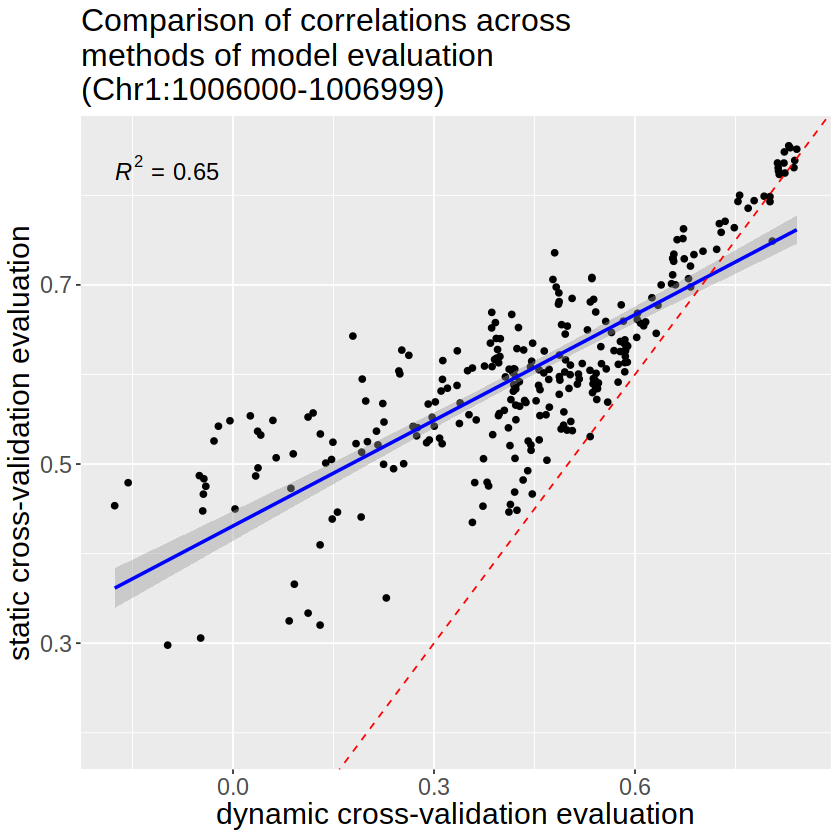

In [85]:
r1

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 661 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 661 rows containing non-finite values (`stat_regline_equation()`).”
Warning message:
“Removed 661 rows containing missing values (`geom_point()`).”


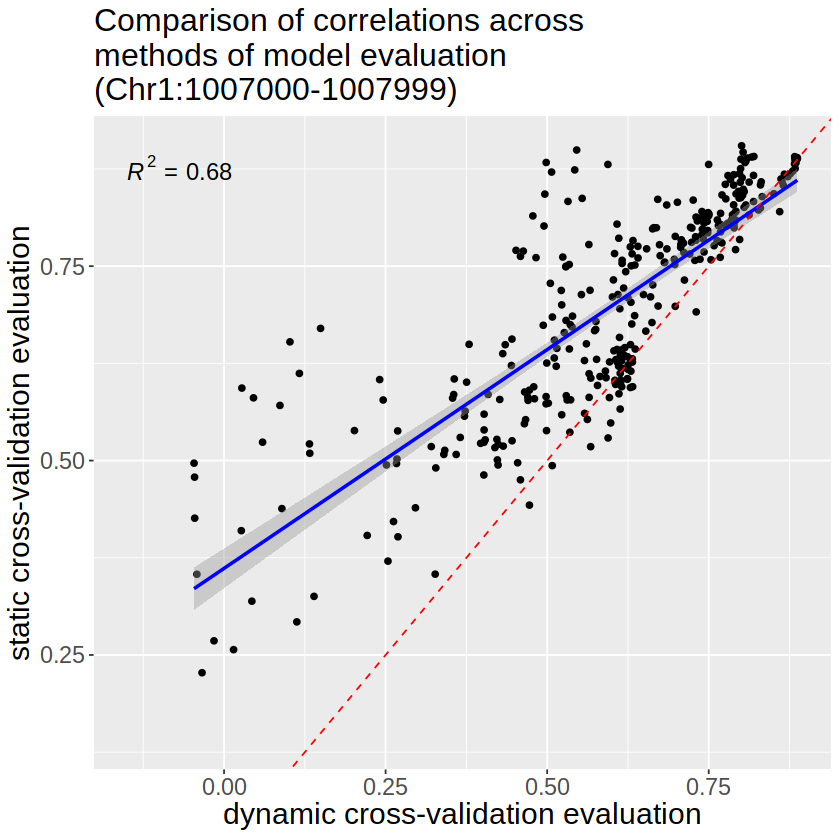

In [86]:
r2

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 819 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 819 rows containing non-finite values (`stat_regline_equation()`).”
Warning message:
“Removed 819 rows containing missing values (`geom_point()`).”


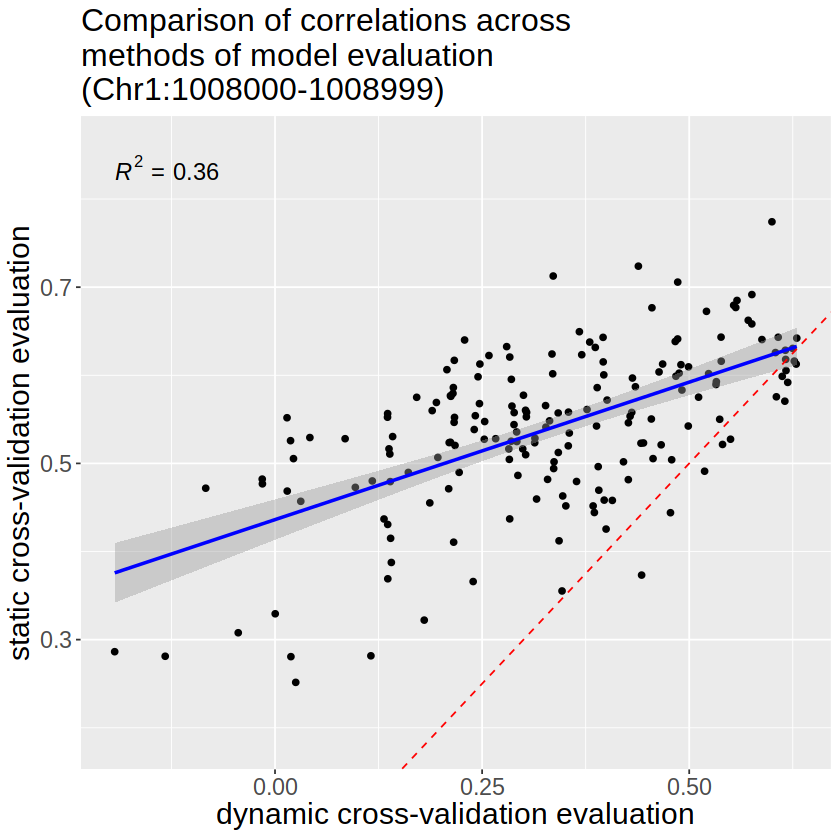

In [87]:
r3